In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr
import equinox as eqx
import matplotlib.pyplot as plt

from functions import ForceNet
from functions import TrueForceNet
from serialization import load

In [2]:
model = load("model_traj_experiment.eqx")
training_losses = jnp.load("training_losses_experiment.npy")
evaluation_losses = jnp.load("evaluation_losses_experiment.npy")

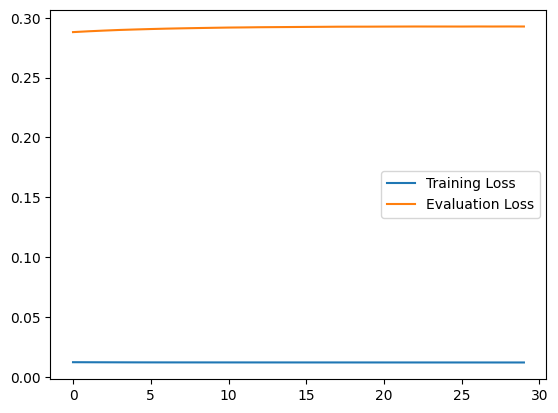

In [3]:
plt.plot(training_losses, label="Training Loss")
plt.plot(evaluation_losses, label="Evaluation Loss")
plt.legend()
plt.show()

In [4]:
true_goal_velocities = jnp.load("v_star.npy")

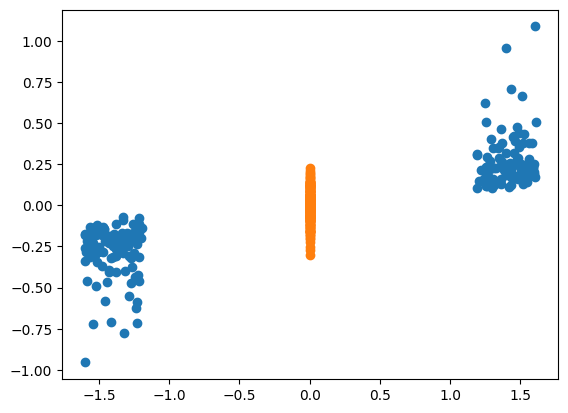

In [5]:
plt.scatter(true_goal_velocities[:, 0], model.goal_velocities[:, 0])
plt.scatter(true_goal_velocities[:, 1], model.goal_velocities[:, 1])
plt.show()

In [6]:
true_model = TrueForceNet(true_goal_velocities, tau=jnp.log(0.5), A=jnp.log(8.0), d0=jnp.log(0.7), B=jnp.log(1.2))
# true_model = TrueForceNet(model.goal_velocities, tau=jnp.log(0.5), A=jnp.log(8.0), d0=jnp.log(0.7), B=jnp.log(1.2))

In [7]:
disp = jnp.concatenate([jnp.linspace(-5, 5, 100)[:, None], jnp.zeros(100)[:, None]], axis=1)

In [8]:
true_forces = jax.vmap(true_model.pedestrian_force, in_axes=(0, 0))(disp, disp)
learned_forces = jax.vmap(model.pedestrian_force, in_axes=(0, 0))(disp, jnp.zeros_like(disp))

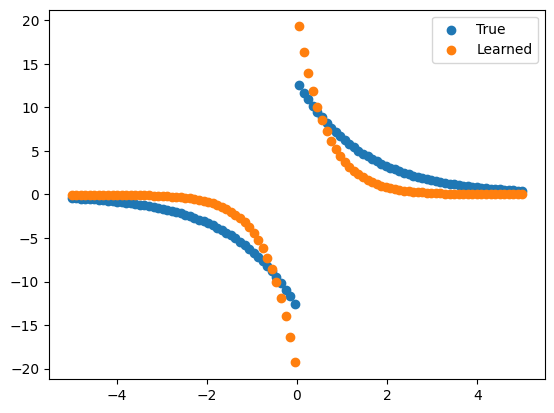

In [9]:
plt.scatter(disp[:, 0], true_forces[:, 0], label="True")
plt.scatter(disp[:, 0], learned_forces[:, 0], label="Learned")
plt.legend()
plt.show()


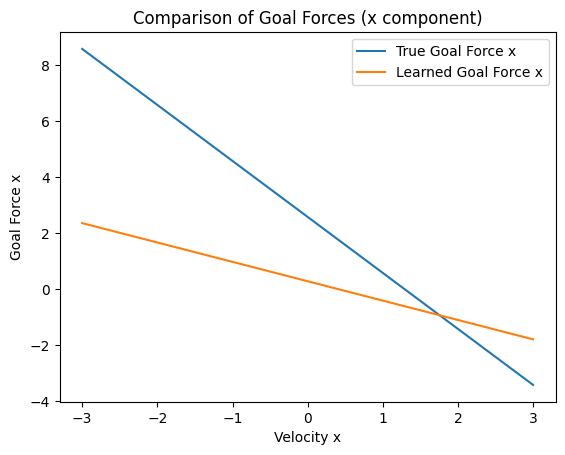

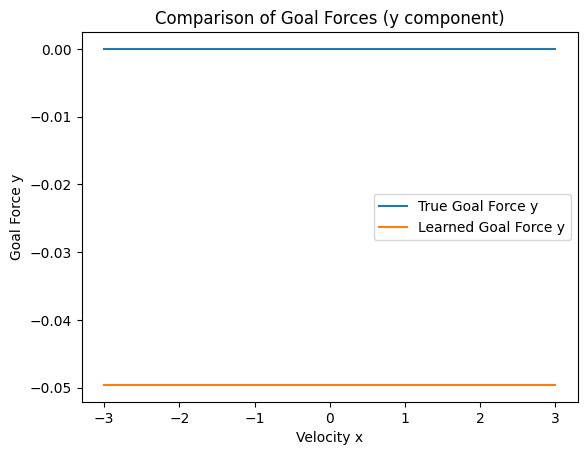

In [10]:
goal_idx = 0  # You can loop through multiple indices or select any index to check

# For an example pedestrian, try a range of velocities
vel_grid = jnp.linspace(-3, 3, 100)
vel_samples = jnp.stack([vel_grid, jnp.zeros_like(vel_grid)], axis=1)  # (100, 2)

# true and learned goal forces
true_goal_forces = jax.vmap(true_model.goal_force, in_axes=(None, 0))(goal_idx, vel_samples)
learned_goal_forces = jax.vmap(model.goal_force, in_axes=(None, 0))(goal_idx, vel_samples)

plt.figure()
plt.plot(vel_samples[:, 0], true_goal_forces[:, 0], label="True Goal Force x")
plt.plot(vel_samples[:, 0], learned_goal_forces[:, 0], label="Learned Goal Force x")
plt.xlabel("Velocity x")
plt.ylabel("Goal Force x")
plt.legend()
plt.title("Comparison of Goal Forces (x component)")

plt.figure()
plt.plot(vel_samples[:, 0], true_goal_forces[:, 1], label="True Goal Force y")
plt.plot(vel_samples[:, 0], learned_goal_forces[:, 1], label="Learned Goal Force y")
plt.xlabel("Velocity x")
plt.ylabel("Goal Force y")
plt.legend()
plt.title("Comparison of Goal Forces (y component)")
plt.show()


In [11]:
model

TrueForceNet(
  goal_velocities=f32[200,2],
  tau=0.3682815134525299,
  A=0.4152187407016754,
  d0=0.4869973659515381,
  B=-0.23923024535179138
)